<a href="https://colab.research.google.com/github/skbhere/OSIC-Pulmonary-Fibrosis-Progression/blob/master/OSIC_Pulmonary_Fibrosis_Progression_ipynb%20cross%20check%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:
train = pd.read_csv("train.csv")
test =pd.read_csv("test.csv")

In [13]:
def regres(x):
    dfx = train.loc[train['Patient'] == x]
    dfx=dfx.reset_index()
    week = np.array(range(-12 ,134))
    week=week.reshape(-1, 1)
    x= np.array(dfx["Weeks"])
    y=np.array(dfx["FVC"])
    x=x.reshape(-1, 1)
    y=y.reshape(-1, 1)
    reg = LinearRegression().fit(x, y)
    con = reg.score(x, y)*100
    pred=reg.predict(week)
    pred =np.round_(pred)
    con =np.round_(con)
    return con,pred


In [14]:
pid = list (test["Patient"])
confidence=[]
FVC = []
patient_week =[]
cc=[]
www=[]
weeks =list(range(-12 ,134))
for x in pid:
    c,p =regres(x)
    cc=[c]*len(p)
    confidence.append(cc)
    FVC.append(p)
    
    for w in weeks:
        www.append(w)
        patient_week.append (x + "_" + str(w))
        

In [15]:
confidence = [item for sublist in confidence for item in sublist]
FVC = np.concatenate(FVC).ravel().tolist()

In [16]:
len(confidence)

730

In [17]:
dic = {'Patient_Week':patient_week,"FVC":FVC,"Confidence":confidence,"Weeks":www}
submission =pd.DataFrame.from_dict(dic)
submission["Patient_Week"]=submission["Patient_Week"].astype(str)
submission["FVC"]=submission["FVC"].astype(int)
submission["Confidence"]=submission["Confidence"].astype(int)

In [18]:
submission=submission.sort_values('Weeks', ascending=True)
submission=submission.drop(columns=['Weeks'])


In [19]:
ss=pd.read_csv("sample_submission (1).csv")

In [20]:
ss=ss.set_index('Patient_Week').join(submission.set_index('Patient_Week'),lsuffix="_ss")


In [21]:
submission=ss.drop(columns=['FVC_ss',"Confidence_ss"])
submission.to_csv("submission.csv",index = True)

In [22]:
submission

,FVC,Confidence
Patient_Week,,
ID00419637202311204720264_-12,2854,15
ID00421637202311550012437_-12,2833,26
ID00422637202311677017371_-12,2042,66
ID00423637202312137826377_-12,3161,42
ID00426637202313170790466_-12,2932,5
...,...,...
ID00419637202311204720264_133,2545,15
ID00421637202311550012437_133,2608,26
ID00422637202311677017371_133,1354,66


In [ ]:
# org_test = test

# for i in range(len(org_test)):
#     submission.loc[submission['Patient_Week']==org_test.Patient[i]+'_'+str(org_test.Weeks[i]), 'FVC'] = org_test.FVC[i]
#     submission.loc[submission['Patient_Week']==org_test.Patient[i]+'_'+str(org_test.Weeks[i]), 'Confidence'] = 70

# submission.to_csv("submission.csv",index = False)

In [23]:
px="ID00421637202311550012437"

In [24]:
    dfx = train.loc[train['Patient'] == px]
    dfx=dfx.reset_index()
    week = np.array(range(-12 ,134))
    week=week.reshape(-1, 1)
    x= np.array(dfx["Weeks"])
    y=np.array(dfx["FVC"])
    x=x.reshape(-1, 1)
    y=y.reshape(-1, 1)
    reg = LinearRegression().fit(x, y)
    con = reg.score(x, y)*100
    pred=reg.predict(week)
    pred =np.round_(pred)
    con =np.round_(con)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


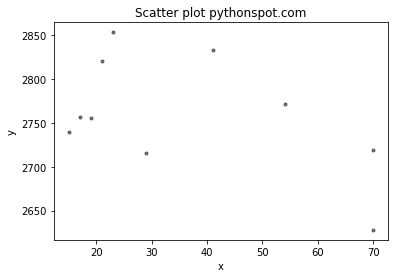

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
N = 500

colors = (0,0,0)
area = np.pi*3

# Plot
# x = pred
# y = week
# plt.scatter(x, y, s=area, c=colors, alpha=0.5)
x1=x
y1=y
plt.scatter(x1, y1, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

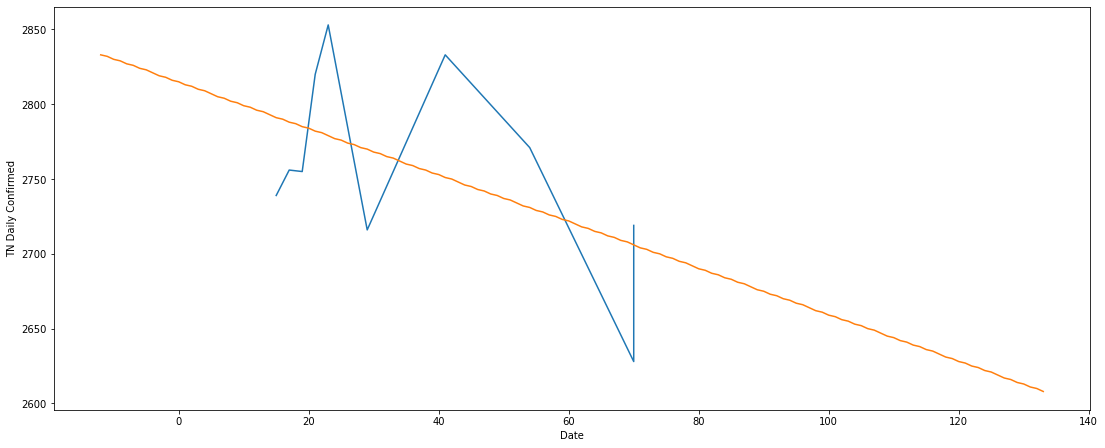

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(18,7))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

time = x
position =y
axes.plot(x, y)

x1 = week
y1 =pred
axes.plot(x1, y1)



plt.xlabel('Date')
plt.ylabel('TN Daily Confirmed')

plt.show()
fig.savefig('TN_Daily.png')

In [27]:
t = pd.read_csv("submission (1).csv")

In [28]:
dt =t[t["Patient_Week"].str.contains(px)]

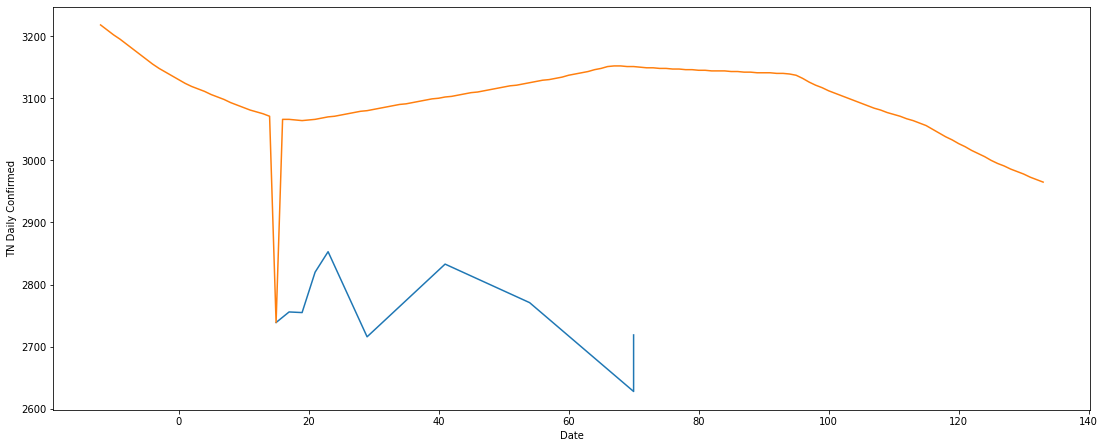

In [29]:
yy = dt["FVC"]
%matplotlib inline
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(18,7))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

time = x
position =y
axes.plot(x, y)

x1 = week
y1 =pred
axes.plot(x1, yy)



plt.xlabel('Date')
plt.ylabel('TN Daily Confirmed')

plt.show()
fig.savefig('TN_Daily.png')
